In [2]:
#Importacion de librerias para mineria de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
#Libreria SKLEARN para los trabajos de clustering KMEANS
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [33]:
#Lectura del archivo CSV para ser analizado
dataframe = pd.read_csv(r"D:\INEI\Tesis\WEKA\Datos Convertidos\Alumno.csv")
#Muestra del archivo CSV con sus atributos
dataframe.head()

,NAL,NOMBRESEDE,NOMBREESCUELA,UBIGEONACIMIENTO,EDAD,DIRECCION,ESTADOCIVIL,DEUDA,MODALIDADINGRESO,PUNTAJEINGRESO,TIPOCOLEGIO,LUGARCOLEGIO,ANOEGRESOCOLEGIO,SEXO
0,1,0,2,2,0,0,2,2,0,2,1,1,2,1
1,2,0,2,2,1,0,2,1,0,2,0,1,2,1
2,3,0,0,2,0,9,2,0,0,1,1,1,2,1
3,4,0,0,2,2,9,2,1,0,1,1,1,0,0
4,5,0,0,2,2,6,2,1,0,0,1,1,0,0


In [34]:
#Mostramos los datos estadisticos de nuestros atributos convertidos a numeros
dataframe.describe()

,NAL,NOMBRESEDE,NOMBREESCUELA,UBIGEONACIMIENTO,EDAD,DIRECCION,ESTADOCIVIL,DEUDA,MODALIDADINGRESO,PUNTAJEINGRESO,TIPOCOLEGIO,LUGARCOLEGIO,ANOEGRESOCOLEGIO,SEXO
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,0.272595,0.919825,0.411079,0.944606,4.549563,1.533528,1.478134,0.097668,1.215743,0.561224,0.467930,1.145773,0.553936
std,198.175427,0.445619,1.099828,0.796045,0.814015,3.409693,0.834239,0.829363,0.297081,0.766135,0.496599,0.499335,0.858978,0.497445
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,172.250000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,343.500000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,514.750000,1.000000,2.000000,0.000000,2.000000,8.000000,2.000000,2.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,686.000000,1.000000,3.000000,2.000000,2.000000,9.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000


In [47]:
#Mostramos el numero de opciones que muestra cada atributo
print(dataframe.groupby('NOMBREESCUELA').size())

NOMBREESCUELA
0    346
1    147
2     95
3     98
dtype: int64


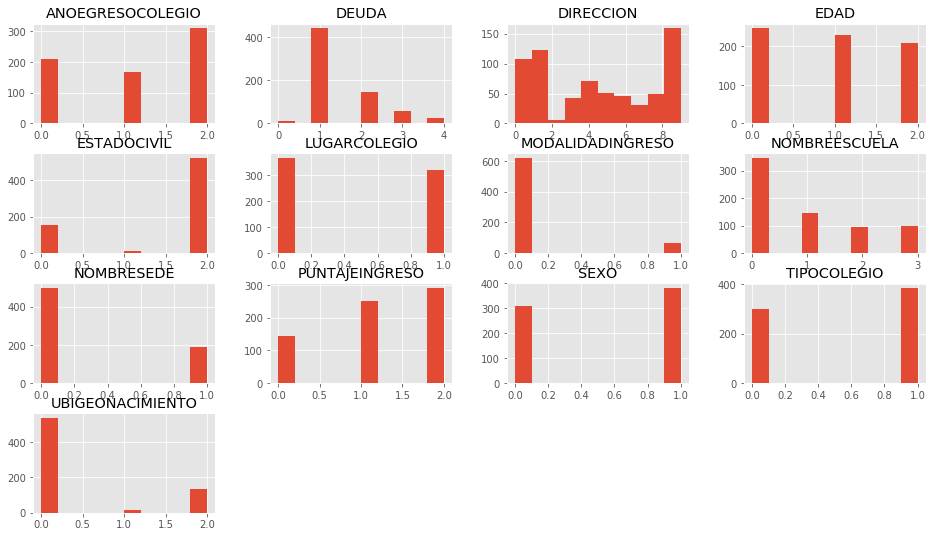

In [40]:
#Podemos mostrar datos mediante Histogramas para entender
#de mejor manera la dispersion de los datos
#Excluimos el valor que no nos interesa saber en este caso
#NAL = Numero del alumno con N atributos
dataframe.drop(['NAL'],1).hist()
plt.show()

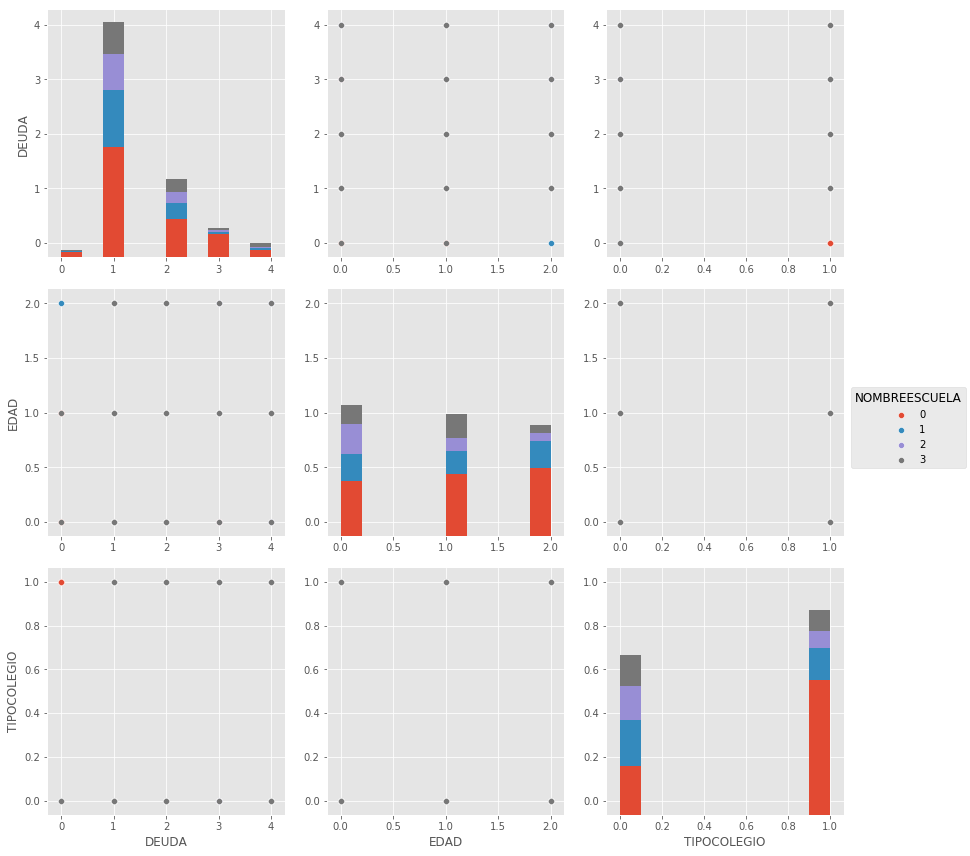

In [48]:
#Seleccionamos 3 atributos en una base tridimensional para poder encontrar
#Alguna relacion o agrupación
sb.pairplot(dataframe.dropna(), hue='NOMBREESCUELA',size=4,vars=["DEUDA","EDAD","TIPOCOLEGIO"],kind='scatter')

In [49]:
#Definimos los datos de entrada
x = np.array(dataframe[["DEUDA","EDAD","TIPOCOLEGIO"]])
y = np.array(dataframe['NOMBREESCUELA'])
#Obtenemos la forma actual de una matriz en base a nuestros atributos
x.shape

(686, 3)

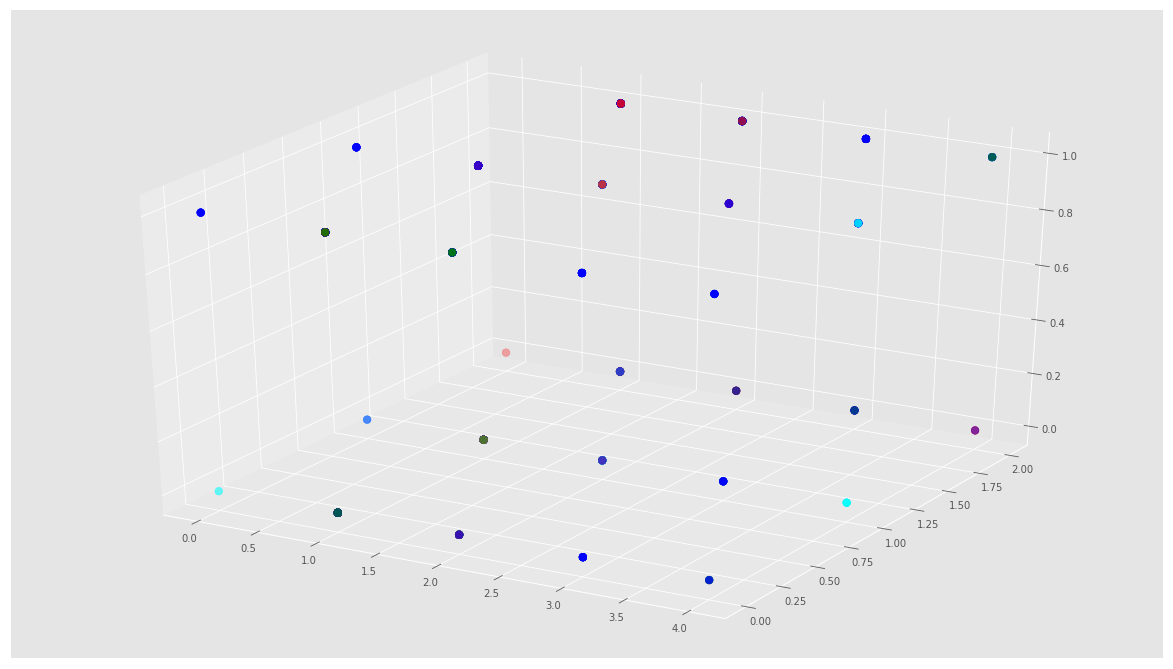

In [56]:
#Representamos una gráfica con los colores diferentes de cada categoria
#Usamos Matplotlib
fig = plt.figure()
#Axes3D para crear un gráfico en 3D
ax = Axes3D(fig)
#Definimos los colores de cada una de nuestras categorias
colores=['blue','red','green','cyan','yellow','orange','black','pink','brown','purple','greenyellow','indigo','peru']
#Creamos una variable de tipo arreglo
asignar=[]
#Creamos una bucle el cual contendra trabajara sobre el atributo "CATEGORIA"
for row in y:
    #Asignamos los colores al gráfico
    asignar.append(colores[row])
#Crear un diagrama de dispersión
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar,s=60)

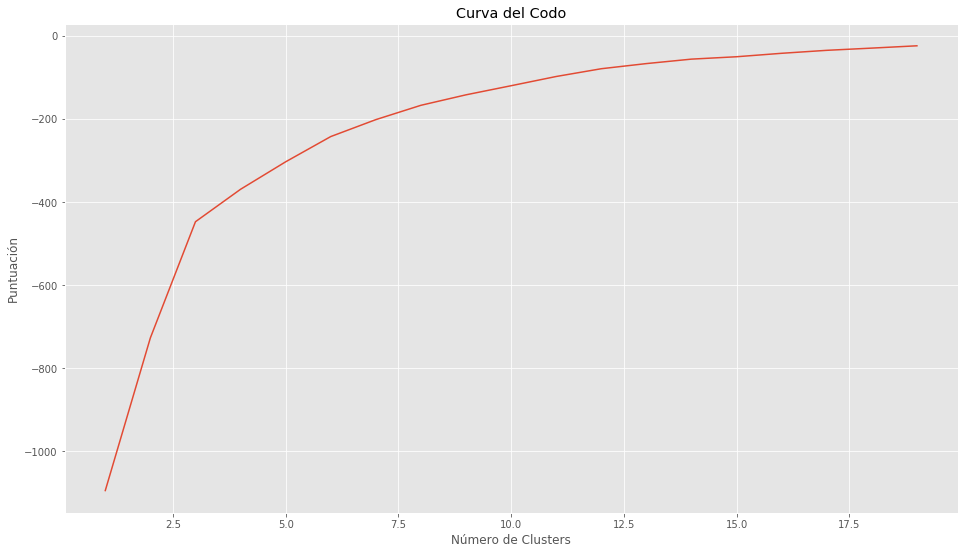

In [60]:
#AHORA EMPEZAMOS A COMPARAR CON EL ALGORITMO DE KMEANS
#PARA ELLO TENEMOS QUE IMPLEMENTAR EL METODO DEL CODO
#Hallamos el número de K
#Seleccionamos un rango de valores para graficar el metodo
nc = range(1, 20)
#Creamos un bucle midiendo el numero de cluster teniendo
#en cuenta el rango desde 1 a 20
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
#La puntuacion es ejecutada sobre el numero de cluster elegido
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
#Graficamos el numero de cluster y la puntuacion
plt.plot(nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación')
plt.title('Curva del Codo')
#Mostramos los resultados
plt.show()
#Los resultados nos muestran que desde el numero 5
#se muestra que esquina del codo donde a partir de este
#no varia demasiado, 5 es el numero probable para NC

In [65]:
#Implementamos Kmeans con el numero de clusters como 5
kmeans = KMeans(n_clusters=6).fit(x)
#mostramos los centroides elegidos sobre nuestra data
centroids = kmeans.cluster_centers_
print(centroids)

[[  9.66480447e-01   1.55307263e+00   1.00000000e+00]
 [  3.38571429e+00   9.28571429e-01   5.28571429e-01]
 [  1.22962963e+00   8.88178420e-16  -2.22044605e-16]
 [  2.15116279e+00   1.75581395e+00   9.06976744e-01]
 [  1.18400000e+00   1.23200000e+00  -2.22044605e-16]
 [  1.15384615e+00  -4.44089210e-16   1.00000000e+00]]


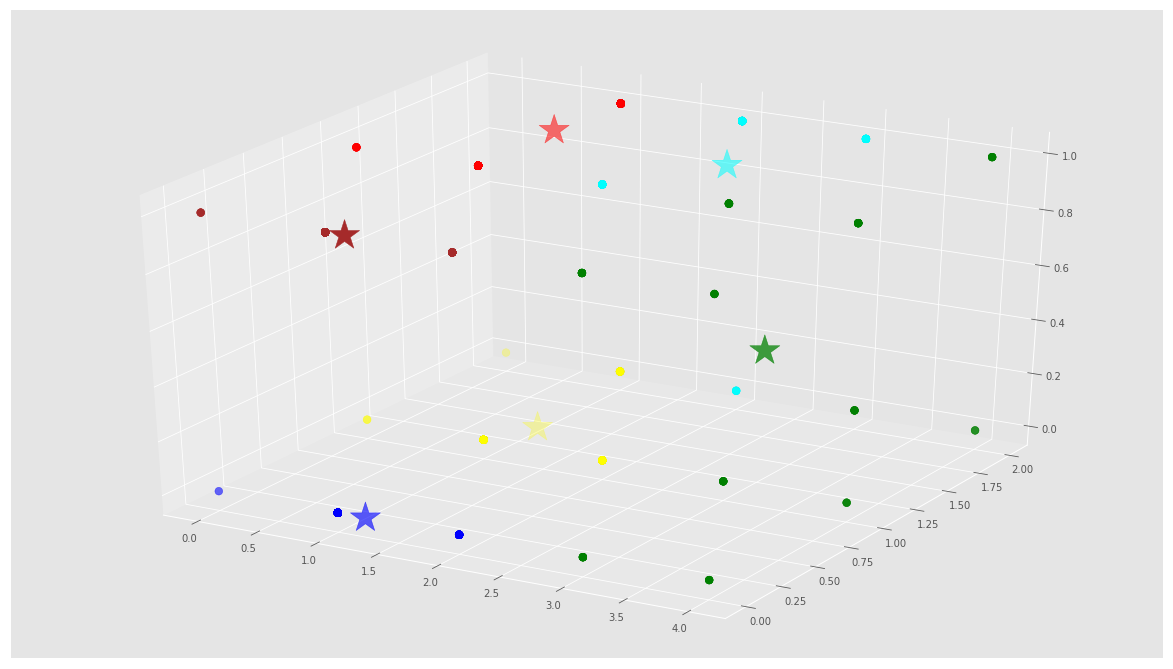

In [66]:
#Vemos una gráfica 3D con colores para los grupos y veremos si se diferencian
#las estrellas marcan el centro de cada cluster
#Predicción de los clusters
etiquetas = kmeans.predict(x)
#Obtenemos los centroides de cada cluster
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow','brown']
asignar=[]
for row in etiquetas:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
#Dibujamos sobre el plano en 3D
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

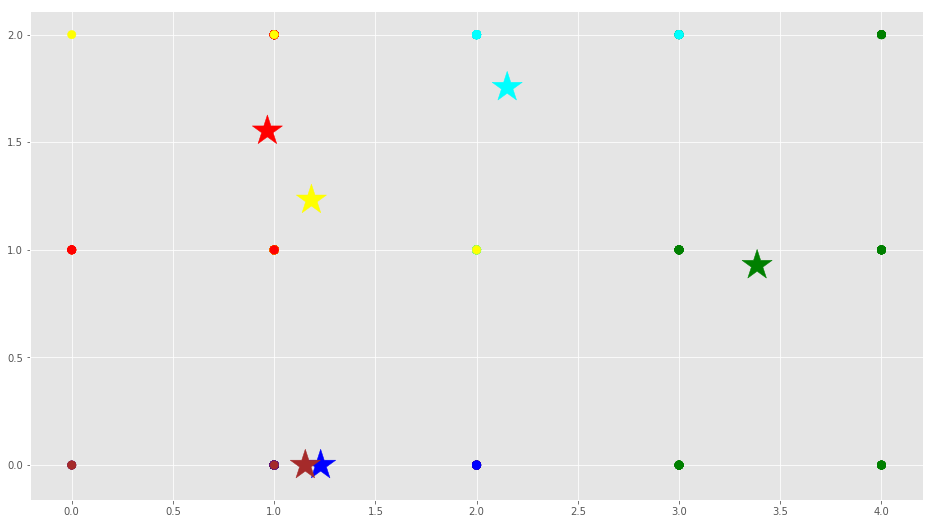

In [67]:
#Obtenemos los valores y dibujamos en un plano 2D
f1 = dataframe['DEUDA'].values
f2 = dataframe['EDAD'].values
#Dibujamos las propiedades de los atributos OP y EX
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
#Mostramos el grafico
plt.show()

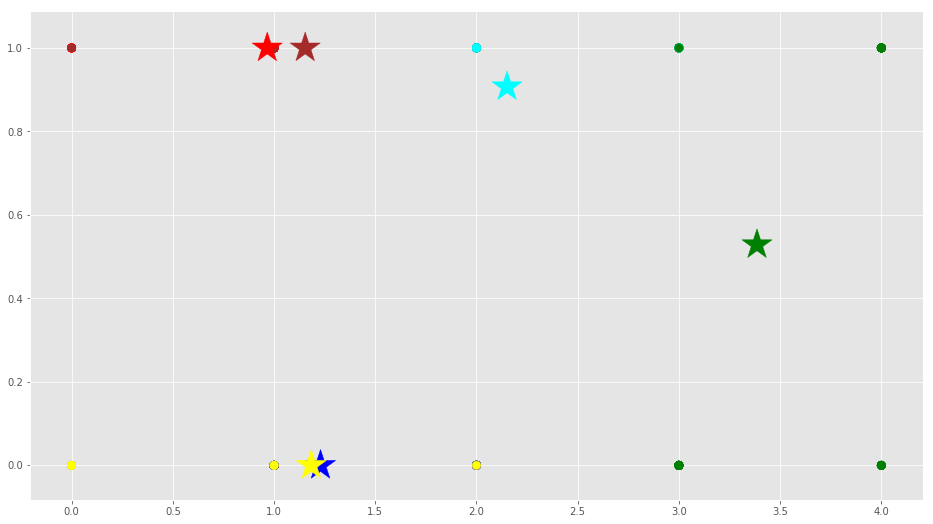

In [68]:
#Obtenemos los valores y dibujamos en un plano 2D
f1 = dataframe['DEUDA'].values
f2 = dataframe['TIPOCOLEGIO'].values
#Dibujamos las propiedades de los atributos OP y AG
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
#Mostramos el grafico
plt.show()

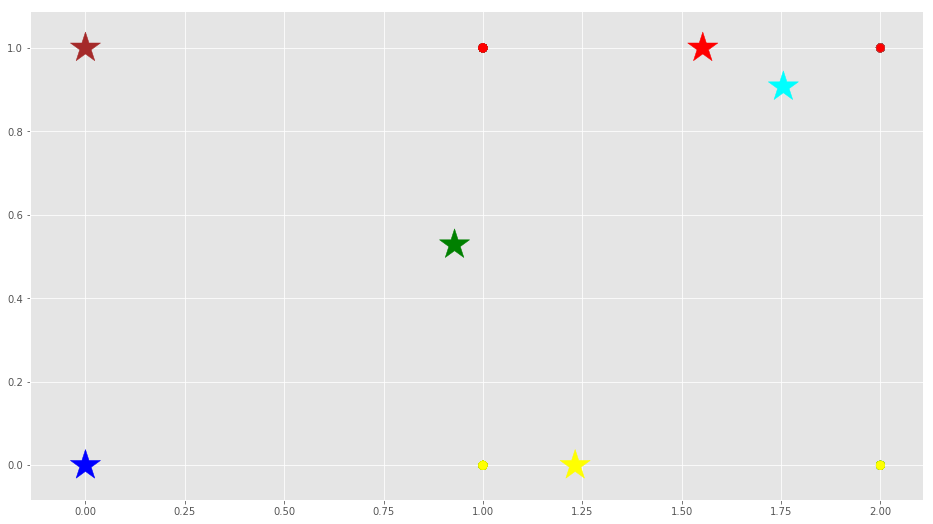

In [69]:
#Obtenemos los valores y dibujamos en un plano 2D
f1 = dataframe['EDAD'].values
f2 = dataframe['TIPOCOLEGIO'].values
#Dibujamos las propiedades de los atributos EX y AG
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
#Mostramos el grafico
plt.show()

In [71]:
#Una vez que vemos los cluster bien esparcidos
#Realizamos el conteo de los clusters
copy =  pd.DataFrame()
copy['NumeroAlumno']=dataframe['NAL'].values
copy['NOMBREESCUELA']=dataframe['NOMBREESCUELA'].values
copy['label'] = etiquetas;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,179
1,green,70
2,blue,135
3,cyan,86
4,yellow,125
5,brown,91


In [75]:
#Podemos ver la diversidad en rubros laborales de cada uno. 
#Por ejemplo en el grupo 0 (rojo),
#vemos que hay de todas las actividades laborales 
#aunque predominan de actividad 1 y 2 correspondiente a
#Actores y Cantantes con 11 y 15 famosos
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
diversidadGrupo =  pd.DataFrame()
#Elegimos el arreglo segun las opciones de escuelas profesionales
diversidadGrupo['NOMBREESCUELA']=[0,1,2,3]
diversidadGrupo['cantidad']=group_referrals.groupby('NOMBREESCUELA').size()
diversidadGrupo

,NOMBREESCUELA,cantidad
0,0,120
1,1,33
2,2,9
3,3,17


In [77]:
#Buscamos usuarios que tengan caracteristicas parecidas
#Vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, x)
closest
#Nos mostrara la posicion en el array de usuarios

array([ 3, 94,  7,  8,  1, 34], dtype=int64)

In [78]:
##Buscamos usuarios que tengan caracteristicas parecidas
users=dataframe['NAL'].values
for row in closest:
    print(users[row])
#Tenemos que buscar a estos alumnos y ver que caracteristicas tienes

4
95
8
9
2
35


In [85]:
#Para clasificar nuevas muestras
x_new = np.array([[0,0,1]]) #davidguetta 
new_labels = kmeans.predict(x_new)
print(new_labels)
#Veremos que nos bota el grupo 2 (AZUL)

[5]
